# Homework -2     


## 1 2D-DFT    

[Image link](http://sipi.usc.edu/database/database.php?volume=misc&image=22#top)
                   
### Write a program that implements the DFT/IDFT pair using the following techniques.
     1. From first principles i.e., as a summation over two dimensions.
 

In [1]:
# imports 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [92]:
def DFT_sum_method(I):
    iota = 1j
    N = len(I)
    M = len(I[0])
    I_real = [[0 for _ in range(M)] for _ in range(N)]
    I_imag = [[iota for _ in range(M)] for _ in range(N)]
    I_dft_mag = [[0 for _ in range(M)] for _ in range(N)]
    I_dft_phase = [[0 for _ in range(M)] for _ in range(N)]
    I_dft = [[0 for _ in range(M)] for _ in range(N)]
    W = np.exp(-iota*(2*np.pi/N))
    for u in range(N):
        for v in range(M):
            temp = 0
            for i in range(N):
                for j in range(M):
                    temp += (I[i][j])*(np.cos(2*np.pi*((u*i/N)+(v*j/M))))
            I_real[u][v] = temp

    for u in range(N):
        for v in range(M):
            temp = 0
            for i in range(N):
                for j in range(M):
                    temp += (I[i][j])*(np.sin(2*np.pi*((u*i/N)+(v*j/M))))
            I_imag[u][v] = -temp
    
    for u in range(N):
        for v in range(M):
            I_dft_mag[u][v] = np.sqrt((I_real[u][v]**2)+(I_imag[u][v]**2))
            
    for u in range(N):
        for v in range(M):
            I_dft_phase[u][v] = np.arctan(I_imag[u][v]/I_real[u][v])
            
    for u in range(N):
        for v in range(M):
            I_dft[u][v] = I_real[u][v]+(iota)*(I_imag[u][v])
    return I_dft,I_dft_mag,I_dft_phase
    

def IDFT_sum_method(I_freq):
    iota = 1j
    N = len(I_freq)
    M = len(I_freq[0])
    I = [[0 for _ in range(M)] for _ in range(N)] 
    I_org_real = [[0 for _ in range(M)] for _ in range(N)]
    I_org_imag = [[0 for _ in range(M)] for _ in range(N)]
    
    for i in range(N):
        for j in range(M):
            temp = 0
            for u in range(N):
                for v in range(M):
                    temp += (I_freq[u][v])*(np.cos(2*np.pi*((u*i/N)+(v*j/M))))
            I_org_real[i][j] = temp/(M*N)

    for i in range(N):
        for j in range(M):
            temp = 0
            for u in range(N):
                for v in range(M):
                    temp += (I_freq[u][v])*(np.sin(2*np.pi*((u*i/N)+(v*j/M))))
            I_org_imag[i][j] = temp/(M*N)
            
    for i in range(N):
        for j in range(M):
            I[i][j] = I_org_real[i][j]+(iota)*(I_org_imag[i][j])
            
    return I


def comp_mag(A):
    o = [[0 for _ in range(len(A[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            o[i][j] = abs(A[i][j])
    return o

Considering submatrix of $32*32$ pixels of original image I

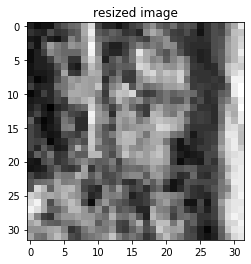

In [67]:
def resize_img(I,N,M):
    return I[0:N,0:M]
# taking 32*32 pixels of original image I.
i_temp = resize_img(I,32,32)
plt.imshow(i_temp,cmap = "gray")
plt.title('resized image')
plt.show()

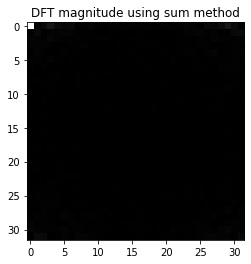

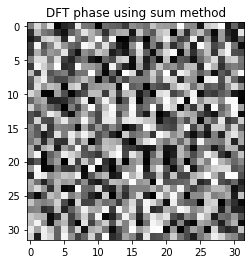

In [85]:
I_dft,I_dft_mag,I_dft_phase = DFT_sum_method(i_temp)
plt.imshow(I_dft_mag,cmap = "gray")
plt.title('DFT magnitude using sum method')
plt.show()
plt.imshow(I_dft_phase,cmap = "gray")
plt.title('DFT phase using sum method')
plt.show()

In [94]:
I_dft,I_dft_mag,I_dft_phase = DFT_sum_method(i_temp)
res = IDFT_sum_method(I_dft)
# checking if IDFT(DFT(I)) = I for sum method
print(np.allclose(res,i_temp))

True


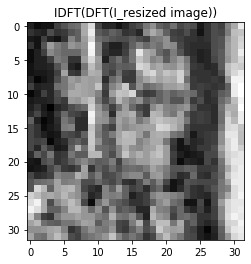

In [96]:
plt.imshow(comp_mag(res),cmap = "gray")
plt.title("IDFT(DFT(I_resized image))")
plt.show()

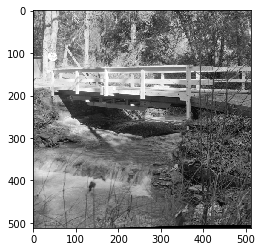

In [3]:
I = mpimg.imread(r'D:\IITH Courses\sem5\Image Processing\Assignment-3\5.2.10.tiff')
plt.imshow(I,cmap = "gray")
plt.show()

Matrix Method

In [35]:
def DFT_matrix_method(I):
    N = len(I)
    M = len(I[0])
    dft_mat = [[0 for _ in range(M)] for _ in range(N)]
    iota = 1j
    W = np.exp(-iota*((2*np.pi)/N))
    for i in range(N):
        for j in range(M):
            dft_mat[i][j] = W**(i*j)
    dft_org = np.matmul(np.matmul(dft_mat,I),dft_mat)
    return dft_org


def IDFT_matrix_method(I_dft):
    N = len(I_dft)
    M = len(I_dft[0])
    iota = 1j
    W = np.exp(-iota*((2*np.pi)/N))
    I_dft_inv = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            I_dft_inv[i][j] = W**(-i*j)/N
    I_retrive = np.matmul(np.matmul(I_dft_inv,I_dft),I_dft_inv)
    return I_retrive


__1. Display the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.__

In [5]:
def DFT_mag(I):
    N = len(I)
    M = len(I[0])
    I_dft = DFT_matrix_method(I)
    dft_mag = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            dft_mag[i][j] = abs(I_dft[i][j])
    return dft_mag
    

def DFT_phase(I):
    N = len(I)
    M = len(I[0])
    I_dft = DFT_matrix_method(I)
    dft_phase = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            dft_phase[i][j] = np.arctan(I_dft[i][j].imag/I_dft[i][j].real)
    return dft_phase 

def Max_Pixel_value(I):
    max_pixel = I[0][0]
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i][j] > max_pixel:
                max_pixel = I[i][j]
    return max_pixel


def Min_Pixel_value(I):
    min_pixel = I[0][0]
    for i in range(len(I)):
        for j in range(len(I[0])):
            if I[i][j] < min_pixel:
                min_pixel = I[i][j]
    return min_pixel  



def Point_OP_val(I,P,L):
    J = [[0 for _ in range(len(I[0]))] for _ in range(len(I))]
    J = np.array(J)
    for i in range(0,len(I)):
        for j in range(0,len(I[0])):
            # values should be int
            temp = int((P*I[i][j])+L) 
            if temp > 255:
                temp = 255
            if temp < 0:
                temp = 0
            J[i][j] = temp
    J = np.array(J)
    return J


def FSCS_val(I):
    B = Max_Pixel_value(I)
    A = Min_Pixel_value(I)
    P = 255/(B-A)
    L = (-255/(B-A))*A 
    J = Point_OP_val(I,P,L)
    return J


def DFT_log(I):
    N = len(I)
    M = len(I[0])
    I_dft = DFT_matrix_method(I)
    dft_log = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            temp = np.abs(I_dft[i][j])
            dft_log[i][j] = np.log(1+temp)
    return FSCS_val(dft_log)
    

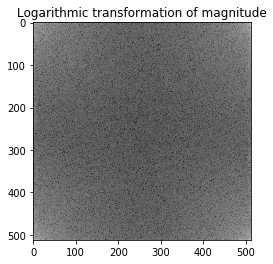

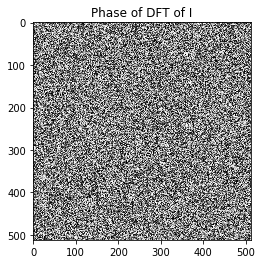

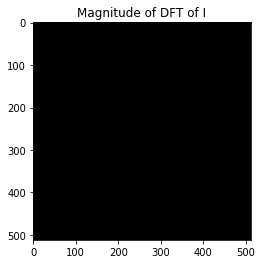

In [132]:
plt.imshow(DFT_log(I),cmap = "gray")
plt.title("Logarithmic transformation of magnitude")
plt.show()
plt.imshow(DFT_phase(I),cmap = "gray")
plt.title("Phase of DFT of I")
plt.show()
plt.imshow(DFT_mag(I),cmap = "gray")
plt.title("Magnitude of DFT of I")
plt.show()

__2.Generate the centered DFT using (−1)^(i+j)I and display its magnitude.__

In [7]:
def DFT_i_plus_j(I):
    N = len(I)
    M = len(I[0])
    new_I  = [[0 for _ in range(M)] for _ in range(N)]
    f = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            temp = (-1)**(i+j)
            new_I[i][j] =+ temp*I[i][j]
    dft = DFT_matrix_method(new_I)
    for i in range(N):
        for j in range(M):
            f[i][j] = abs(dft[i][j]) 
    return f


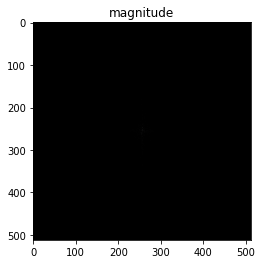

In [133]:
img = DFT_i_plus_j(I)
plt.imshow(img,cmap = "gray")
plt.title("magnitude")
plt.show()

__3. Verify that IDFT[DFT[I]] = I.__

In [9]:
I_dft = DFT_matrix_method(I)
Retvd = IDFT_matrix_method(I_dft)
def check(a,b):
    for i in range(len(a)):
        for j in range(len(a[0])):
            temp1 = a[i][j]
            temp2 = np.round(b[i][j].real,decimals = 0)
            if temp1 != temp2:
                return False
    return True
            
print(check(I,Retvd))

True


In [10]:
print(np.allclose(I,Retvd))

True


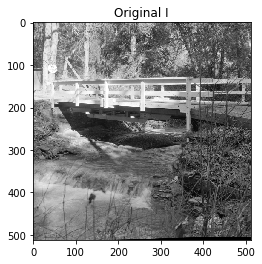

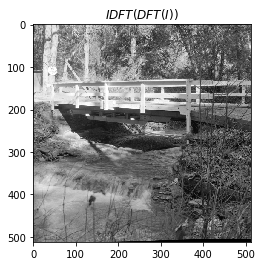

In [134]:
plt.imshow(I,cmap = "gray")
plt.title("Original I")
plt.show()
plt.imshow(comp_mag(Retvd),cmap = "gray")
plt.title("$IDFT(DFT(I))$")
plt.show()

#### 4   
#### a) setting the phase to 0

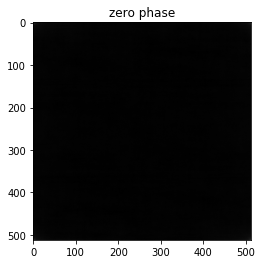

In [135]:
# Any complex number can be written as r*(e^i*thetA) making theta as 0 we get only r which is magnitude of the complex number
def zero_phase(I):
    N = len(I)
    M = len(I[0])
    k = DFT_mag(I)
    for i in range(len(I)):
        for j in range(len(I[0])):
            k[i][j] += 0j               # making phase 0
    f = IDFT_matrix_method(k)
    res = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(len(I)):
        for j in range(len(I[0])):
            res[i][j] = abs(f[i][j])
    return res

plt.imshow(zero_phase(I),cmap = "gray")
plt.title("zero phase")
plt.show()


__b)by adding noise.__

for a complex number $r e^{j\theta}$ adding noise is $r e^{j(\theta+a)}$

In [230]:
def add_noise(I,a):
    N = len(I)
    M = len(I[0])
    temp = [[0 for _ in range(M)] for _ in range(N)]
    f = [[0 for _ in range(M)] for _ in range(N)]
    phase = [[0 for _ in range(M)] for _ in range(N)]
    iota = 1j
    I_dft = DFT_matrix_method(I)
    p = DFT_phase(I)
    mag = DFT_mag(I)
    for i in range(N):
        for j in range(M):
            phase[i][j] = np.angle(I_dft[i][j])
    for i in range(N):
        for j in range(M):
            temp[i][j] = (mag[i][j])*(np.exp((iota)*(phase[i][j]+a)))
    res = IDFT_matrix_method(temp)
    for i in range(N):
        for j in range(M):
            f[i][j] = abs(res[i][j])
    return f



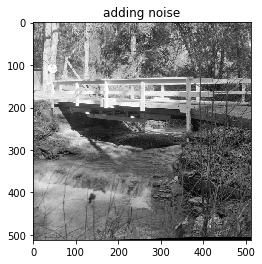

In [231]:
plt.imshow(add_noise(I,100),cmap = "gray")
plt.title("adding noise")
plt.show()

In [232]:
p1 = add_noise(I,10)
p2 = add_noise(I,0)
print(np.allclose(p1,p2))

True


We can observe from above that adding different noises $0$ anf $10$ is not changing the output

## 2.  Periodic Convolution   
         
         
#### 1. Circulary convolve two images. Test your program by using an image and an averaging filter of size 5 × 5.

In [14]:
def Average_Filter(N,M):
    f = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            f[i][j] = 1/M*N
    return f

In [15]:
def Circular_convl(I,f):
    U = len(f)
    V = len(f[0])
    N = len(I)
    M = len(I[0])
    circ = [[0 for _ in range(M)] for _ in range(N)]
    # J(i, j) =N−1∑p=0 M−1∑q=0 I1[(i − p)N, (j − q)M]I2(p, q)
    for i in range(N):
        for j in range(M):
            temp = 0
            for u in range(U):
                for v in range(V):
                    temp += (I[(i-u)%N][(j-v)%M])*(f[u][v])
            circ[i][j] = temp
    return circ

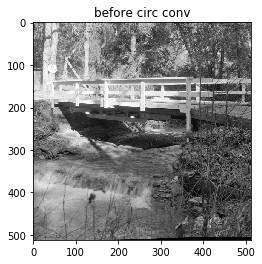

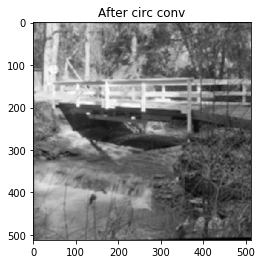

In [16]:
a = Average_Filter(5,5)
fin = Circular_convl(I,a)
plt.imshow(I,cmap = "gray")
plt.title("before circ conv")
plt.show()
plt.imshow(fin,cmap = "gray")
plt.title("After circ conv")
plt.show()

#### 2.Linearly convolve the same image and filter using the circular convolution

In [17]:
def Linear_conv(I,f):
    U = len(f)
    V = len(f[0])
    N = len(I)*2
    M = len(I[0])*2
    zero_padded_I = [[0 for _ in range(M)] for _ in range(N)]
    res = [[0 for _ in range(len(I[0]))] for _ in range(len(I))]
    for i in range(len(I)):
        for j in range(len(I[0])):
            zero_padded_I[i][j] = I[i][j] 
    circ = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(N):
        for j in range(M):
            temp = 0
            for u in range(U):
                for v in range(V):
                    temp += (zero_padded_I[(i-u)%N][(j-v)%M])*(f[u][v])
            circ[i][j] = temp
    for i in range(len(I)):
        for j in range(len(I[0])):
            res[i][j] = circ[i][j]
    return res

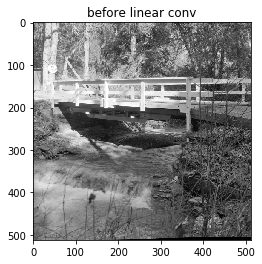

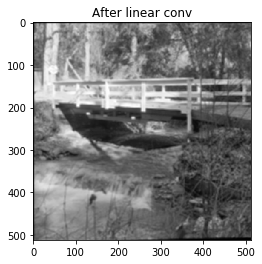

In [18]:
a = Average_Filter(5,5)
final = Linear_conv(I,a)
plt.imshow(I,cmap = "gray")
plt.title("before linear conv")
plt.show()
plt.imshow(final,cmap = "gray")
plt.title("After linear conv")
plt.show()

#### 3. linear covolution using the DFT of zero padded images.

In [70]:
def comp_mag(A):
    o = [[0 for _ in range(len(A[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            o[i][j] = abs(A[i][j])
    return o

def Conv_using_DFT(I,f):
    U = len(f)
    V = len(f[0])
    N = len(I)*2
    M = len(I[0])*2
    zero_pad_I = [[0 for _ in range(M)] for _ in range(N)]
    zero_pad_f = [[0 for _ in range(M)] for _ in range(N)]
    final = [[0 for _ in range(len(I[0]))] for _ in range(len(I))]
    res = [[0 for _ in range(M)] for _ in range(N)]
    for i in range(len(I)):
        for j in range(len(I[0])):
            zero_pad_I[i][j] = I[i][j]
    for u in range(len(f)):
        for v in range(len(f[0])):
            zero_pad_f[u][v] = f[u][v]
    DFT_I = DFT_matrix_method(zero_pad_I)
    DFT_F = DFT_matrix_method(zero_pad_f)
    for i in range(N):
        for j in range(M):
            res[i][j] = DFT_I[i][j]*DFT_F[i][j]
    out = IDFT_matrix_method(res)
    out = comp_mag(out)
    for i in range(len(I)):
        for j in range(len(I[0])):
            final[i][j] = out[i][j]
    return final


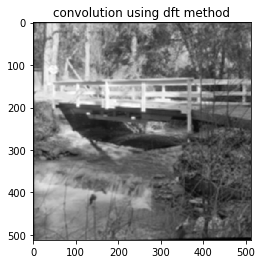

In [137]:
a = Average_Filter(5,5)
k = Conv_using_DFT(I,a)
plt.imshow(k,cmap = "gray")
plt.title('convolution using dft method')
plt.show()

Checking if 2.2 and 2.3 are producing same results

In [139]:
a = Average_Filter(5,5)
q2 = Linear_conv(I,a)
q3 = Conv_using_DFT(I,a)
print(check(q2,q3))

True


## 3 Image Denoising using Linear Filters

In [140]:
def add_guassian_noise_to_image(I,mean,sigma):
    N = len(I)
    M = len(I[0])
    res = [[0 for _ in range(M)] for _ in range(N)]
    noise = np.random.normal(mean,sigma, size=(N,M))
    for i in range(N):
        for j in range(M):
            res[i][j] = I[i][j]+noise[i][j]
    return res

$\sigma^{2} = 25$    
$\implies \sigma = 5$

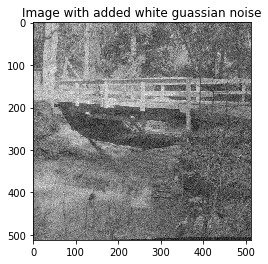

In [141]:
I_noise = add_guassian_noise_to_image(I,0,5)
plt.imshow(p,cmap = "gray")
plt.title("Image with added white guassian noise")
plt.show()


#### 1.Average filter of size M × M.

* As we are using Linear Convolution method which has $O(N^{2} M^{2})$ time complexity as M increases it takes much more time to compute

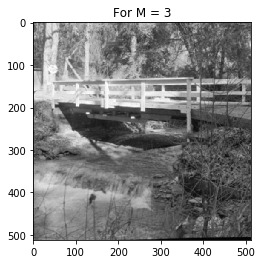

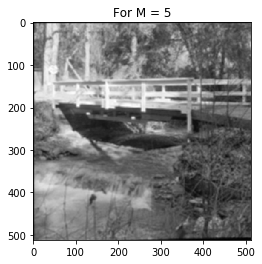

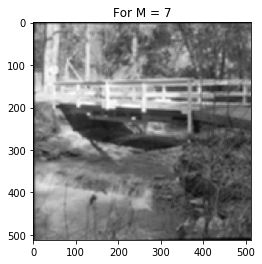

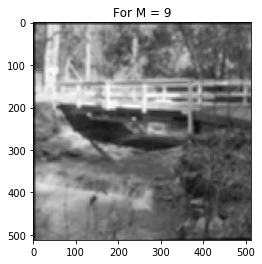

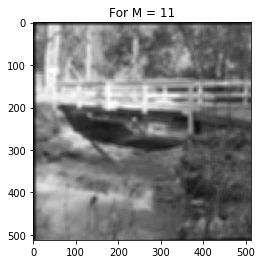

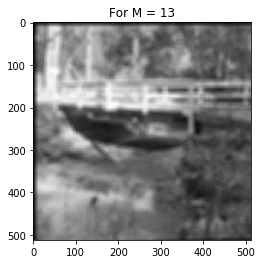

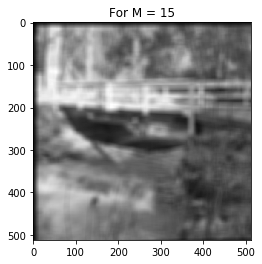

In [128]:
def Denoise_average_filter(I,M):
    avg = Average_Filter(M,M)
    res = Linear_conv(I,avg)
    return res

def all_plots(I_noise):
    for M in range(3,16,2):
        temp = Denoise_average_filter(I_noise,M)
        plt.imshow(temp,cmap = "gray")
        plt.title("For M = "+str(M))
        plt.show()

all_plots(I_noise)

 - We can observe that as $M$ increases smoothness of image increases 
 - This over smoothness is resulting in loss of information of image
 - So,the Average filter with $M=3$ is providing a balance between smoothing and denoising

#### 2. Gaussian filter of size 5 × 5.

In [114]:
def Guassian_filter(M,sigma):
    guassian = [[0 for _ in range(M)] for _ in range(M)]
    for u in range(M):
        for v in range(M):
            t1 = -2*(np.pi**2)*(sigma**2)
            t2 = (u**2 + v**2)/(M**2)
            guassian[u][v] = np.exp(t1*t2)
    return guassian

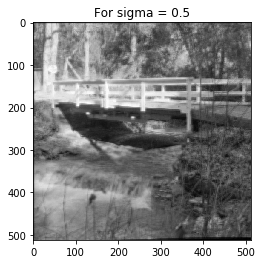

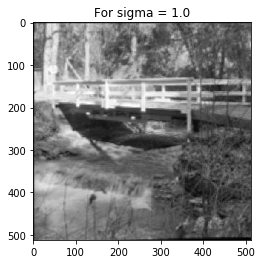

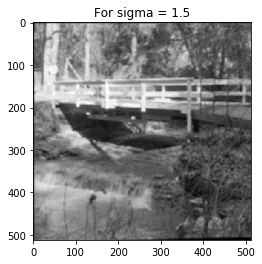

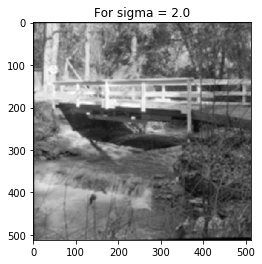

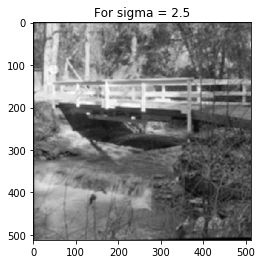

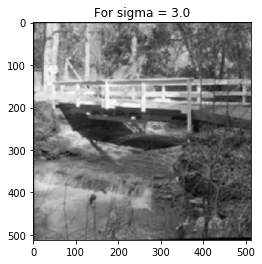

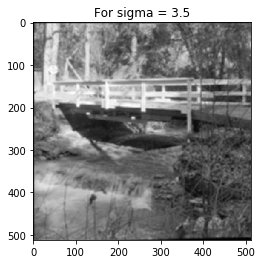

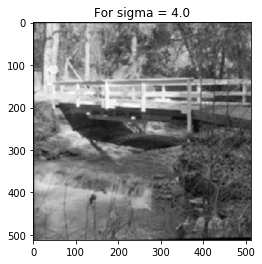

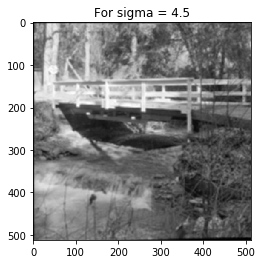

In [131]:
def Denoise_guassian_filter(I,sigma):
    g_dft = Guassian_filter(5,sigma)
    r = IDFT_matrix_method(g_dft)
    res = Linear_conv(I,r)
    return res    

def vary_sigma_plots(I_noise):
    l = np.arange(0.5,5,0.5)
    for sigma in l:
        temp = comp_mag(Denoise_guassian_filter(I_noise,sigma))
        plt.imshow(temp,cmap = "gray")
        plt.title("For sigma = "+str(sigma))
        plt.show()

vary_sigma_plots(I_noise)